In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
%matplotlib inline 
np.random.seed(7) # seeding random number generator

csv = "data1.csv"
df = pd.read_csv(csv,engine='python',error_bad_lines=False)



Skipping line 19647: unexpected end of data


In [ ]:
len(df)

34627

In [ ]:
print("Data points before elimination : ",len(df))
df=df.dropna(subset=["reviews.rating"])
print("Data points after elimination : ",len(df))


Data points before elimination :  34627
Data points after elimination :  34627


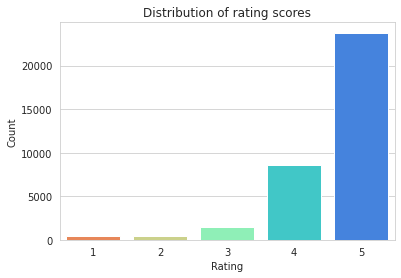

In [ ]:
sns.countplot(df['reviews.rating'], palette='rainbow_r')

plt.title('Distribution of rating scores')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [ ]:
df2 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv",error_bad_lines=False, engine="python")
#df3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv",error_bad_lines=False, engine="python")

In [ ]:
df3 = pd.read_csv("Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv",error_bad_lines=False, engine="python")

In [ ]:
# Eliminating data points which has no ratings
df2=df2.dropna(subset=["reviews.rating"])
df3=df3.dropna(subset=["reviews.rating"])

# using only data of rating lower than or equal to 3 and resetting index after filtering rows
df2 = df2[df2["reviews.rating"] <= 3].reset_index(drop=True) 
df3 = df3[df3["reviews.rating"] <= 3].reset_index(drop=True)
df2['reviews.rating'].value_counts().sort_index(ascending=False)
df3['reviews.rating'].value_counts().sort_index(ascending=False)

# concatenation
data = pd.concat([df, df2, df3],axis=0,ignore_index=True)
data = data.dropna(subset=["reviews.rating"])
len(data)


37728

In [ ]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [ ]:
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,7.000000e+00,35532.000000,37728.000000,0.0,0.0
mean,1.572322e+08,0.659293,4.382077,NaN,NaN
std,4.189041e+07,13.524891,1.008872,NaN,NaN
min,1.082112e+08,0.000000,1.000000,NaN,NaN
25%,1.150383e+08,0.000000,4.000000,NaN,NaN
50%,1.867536e+08,0.000000,5.000000,NaN,NaN
75%,1.884934e+08,0.000000,5.000000,NaN,NaN
max,1.985974e+08,814.000000,5.000000,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37728 entries, 0 to 37727
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    37728 non-null  object 
 1   name                  30969 non-null  object 
 2   asins                 37726 non-null  object 
 3   brand                 37728 non-null  object 
 4   categories            37728 non-null  object 
 5   keys                  37728 non-null  object 
 6   manufacturer          37728 non-null  object 
 7   reviews.date          37699 non-null  object 
 8   reviews.dateAdded     24086 non-null  object 
 9   reviews.dateSeen      37728 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   35457 non-null  object 
 12  reviews.id            7 non-null      float64
 13  reviews.numHelpful    35532 non-null  float64
 14  reviews.rating        37728 non-null  int64  
 15  reviews.sourceURLs 

In [ ]:
data["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B01AHB9CYG',
       'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2', 'B018Y229OU',
       'B00REQKWGA', 'B00IOYAM4I', 'B018T075DC', nan, 'B00DU15MU4',
       'B018Y225IA', 'B005PB2T2Q', 'B018Y23MNM', 'B00OQVZDJM',
       'B00IOY8XWQ', 'B00LO29KXQ', 'B00QJDU3KY', 'B018Y22C2Y',
       'B01BFIBRIE', 'B01J4ORNHU', 'B018SZT3BK', 'B00UH4D8G2',
       'B018Y22BI4', 'B00TSUGXKE', 'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K',
       'B00X4WHP5E', 'B00QFQRELG', 'B00LW9XOJM', 'B00QL1ZN3G',
       'B0189XYY0Q', 'B01BH83OOM', 'B00U3FPN4U', 'B002Y27P6Y',
       'B006GWO5NE', 'B006GWO5WK', 'B00QWO9P0O,B00LH3DMUO',
       'B00DIHVMEA,B00EZ1ZTV0', 'B00QWO9P0O,B01IB83NZG,B00MNV8E0C',
       'B00WRDS8H0', 'B00EEBS9O0,B01CHQHIJK',
       'B01B66989K,B00CD8ADKO,B00LA9H6UM', 'B00DUGZFWY',
       'B00F5CKWBA,B00KPQCWAU', 'B006BGZJJ4', 'B00Y3QOH5G', 'B00BGIQS1A',
       'B018SZT3BK,B01AHB9CN2', 'B018Y226XO', 'B01ACEKAJY', 'B01IO618J8',
       'B01AHBBG04', 'B01AHBDCKQ', 'B0

In [ ]:
asins_unique = len(data["asins"].unique())
print("Number of Unique ASINs: " + str(asins_unique))

Number of Unique ASINs: 72


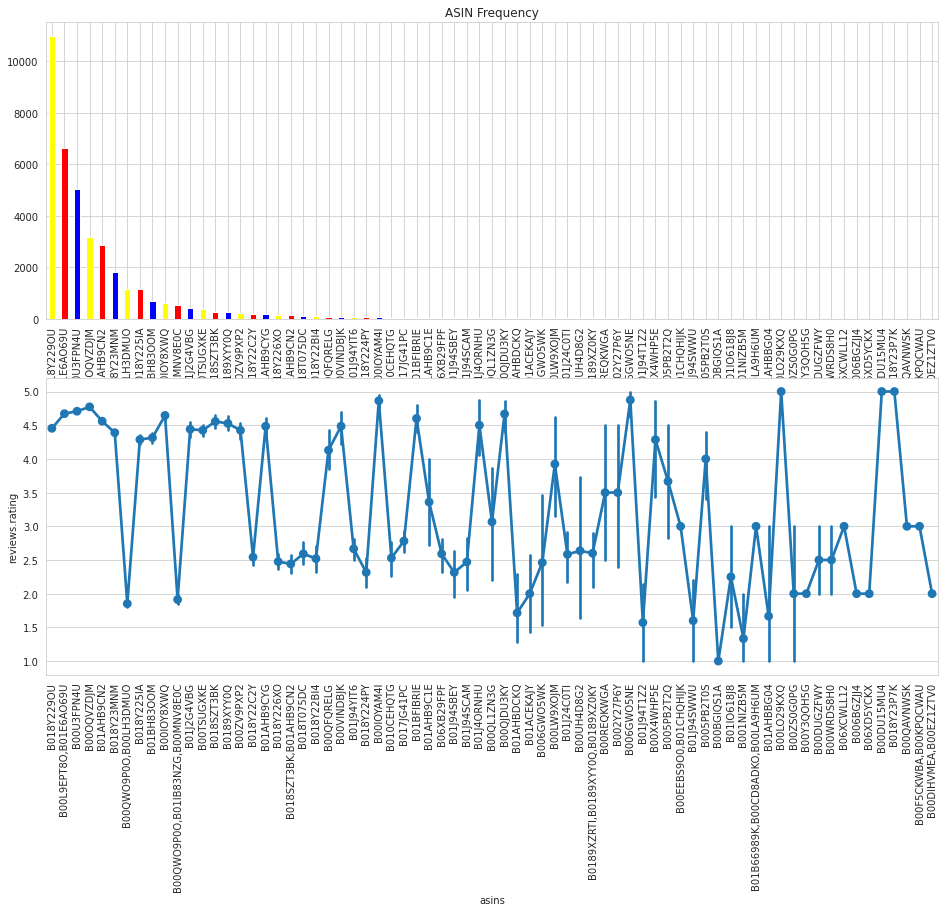

In [ ]:
asins_count_ix = data["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
data["asins"].value_counts().plot(kind="bar", title="ASIN Frequency",color=['yellow', 'red', 'blue'])
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=data )
plt.xticks(rotation=90)
plt.show()

In [ ]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"

In [ ]:
data["reviews.text"][34624 :]

34624    Love my Kindle Fire but I am really disappoint...
34625    I was surprised to find it did not come with a...
34626    to spite the fact that i have nothing but good...
34627    I order 3 of them and one of the item is bad q...
34628    These do not hold the amount of high power jui...
                               ...                        
37723    The battery is having more and more trouble ho...
37724    My daughter has had this tablet for almost 2 m...
37725    Very cheap and was not impressed at all never ...
37726    Hard to use, Lots of ads, and Randomly closes ...
37727    I wish it has some more of the apps from the p...
Name: reviews.text, Length: 3104, dtype: object

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
corpus = []
for i in range(0,37728):
    review = re.sub('[^a-zA-Z]', ' ', str(data['reviews.text'][i]))
    review = review.lower()
    review = review.split()
    #ps = PorterStemmer()
    wordnet = WordNetLemmatizer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    #review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = [wordnet.lemmatize(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
print(corpus)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
len(corpus)

37728

In [ ]:
from sklearn.model_selection import train_test_split
data["reviews.rating"] = data["reviews.rating"].astype(int)
data["Sentiment"] = data["reviews.rating"].apply(sentiments)

X_train, X_test,y_train, y_test = train_test_split(
    corpus, data["Sentiment"] , test_size=0.20, random_state=42, stratify= data["reviews.rating"] )

In [ ]:
X_test

['love lightweight great outdoor reading travel around reading',
 'bought mom upgrade older non hd kindle fire improvement front bigger better screen better speaker faster processor updated operating system plus slot external storage great price get',
 'recommend buying month buying charge turn',
 'alexa work well connect many automated home system great amount freestanding application well',
 'wonderful streaming box easy set lag provides channel cannot get apple tv absolutely love',
 'absolutely love new kindle voyager lightweight compact size make easier carry everywhere go wish bought one sooner',
 'bought regret must gotten bad batch since lasting three week smoke detector week smoke detector using started beeping like low power battery tester confirmed battery low replaced store bought rayovac battery issue',
 'exactly supposed work great love built light perfect reader quick delivery',
 'great budget tablet performs like one x much',
 'tablet perfect size kid great adult looking

In [ ]:
y_test

18311    Positive
2670     Positive
36783    Negative
27278    Positive
31109    Positive
           ...   
37295    Negative
9959     Positive
37108     Neutral
2720     Positive
24487    Positive
Name: Sentiment, Length: 7546, dtype: object

In [ ]:
print("Training Sample :",len(X_train))
print("Testing sample :", len(X_test))

Training Sample : 30182
Testing sample : 7546


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
# Text preprocessing and occurance counting

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
X_train_counts.shape
print("Training Sample :",(X_train_counts.shape[0]))
print("Distinct Words :", (X_train_counts.shape[1]))

Training Sample : 30182
Distinct Words : 11292


In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf_multiNB_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_nominalNB", MultinomialNB())])
clf_multiNB_pipe.fit(X_train, y_train)
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == y_test)

0.871587596077392

In [ ]:
review=str(input())
review=[review]
lol=clf_multiNB_pipe.predict(review)
print(lol)

review_bad=str(input())
review_bad=[review_bad]
rofl=clf_multiNB_pipe.predict(review_bad)
print(rofl)

The product is bad
['Positive']
The product is good
['Positive']


In [ ]:
#logistics regression
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, y_train)

predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == y_test)
print('Accuracy: {}'. format(accuracy_score(y_test, predictedLogReg)))


Accuracy: 0.9063079777365491


In [ ]:
#rough work start
review=str(input())
review=[review]
lol=clf_logReg_pipe.predict(review)
print(lol)

review_bad=str(input())
review_bad=[review_bad]
rofl=clf_logReg_pipe.predict(review_bad)
print(rofl)

The product is very bad
['Positive']
The product is satisfactory
['Positive']


In [ ]:
# linear SVM
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, y_train)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == y_test)

0.9154518950437318

In [ ]:
#rough work start
review=str(input())
review=[review]
lol=clf_linearSVC_pipe.predict(review)
print(lol)

review_bad=str(input())
review_bad=[review_bad]
rofl=clf_linearSVC_pipe.predict(review_bad)
print(rofl)

The product is too bad
['Positive']
Disatisfactory
['Positive']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
clf_rf_pipe = Pipeline([("vect", CountVectorizer()), ("tfidf", TfidfTransformer()), ("clf_rf", RandomForestClassifier(n_estimators=10))])
clf_rf_pipe.fit(X_train, y_train)

predictedrf = clf_rf_pipe.predict(X_test)
np.mean(predictedrf == y_test)
print('Accuracy: {}'. format(accuracy_score(y_test, predictedrf)))

In [ ]:
#rough work start
review=str(input())
review=[review]
lol=clf_rf_pipe.predict(review)
print(lol)

review_bad=str(input())
review_bad=[review_bad]
rofl=clf_rf_pipe.predict(review_bad)
print(rofl)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test,predictedLinearSVC))
print('Accuracy: {}'. format(accuracy_score(y_test, predictedLinearSVC)))

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test,predictedLinearSVC))
print('Accuracy: {}'. format(accuracy_score(y_test, predictedLinearSVC)))

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, predictedLinearSVC)